# Bike Sharing : Multiple Linear Regression

## Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the Bike Sharing dataset.

In [1]:
import numpy as np
import pandas as pd

# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
Bike = pd.read_csv(r"C:\Users\Hp\Desktop\Data Science\Machine Learning\Assignment\day.csv")

In [3]:
# Check the head of the dataset

Bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect the various aspects of the Bike sharing dataframe

In [4]:
Bike.shape

(730, 16)

In [5]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
Bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step 2: Visualising the Data
Let's now spend some time on visualisation. what is arguably the most important step - understanding the data.

If there is some obvious multicollinearity going on, this is the first place to catch it
Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using matplotlib and seaborn.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

<Figure size 720x1080 with 0 Axes>

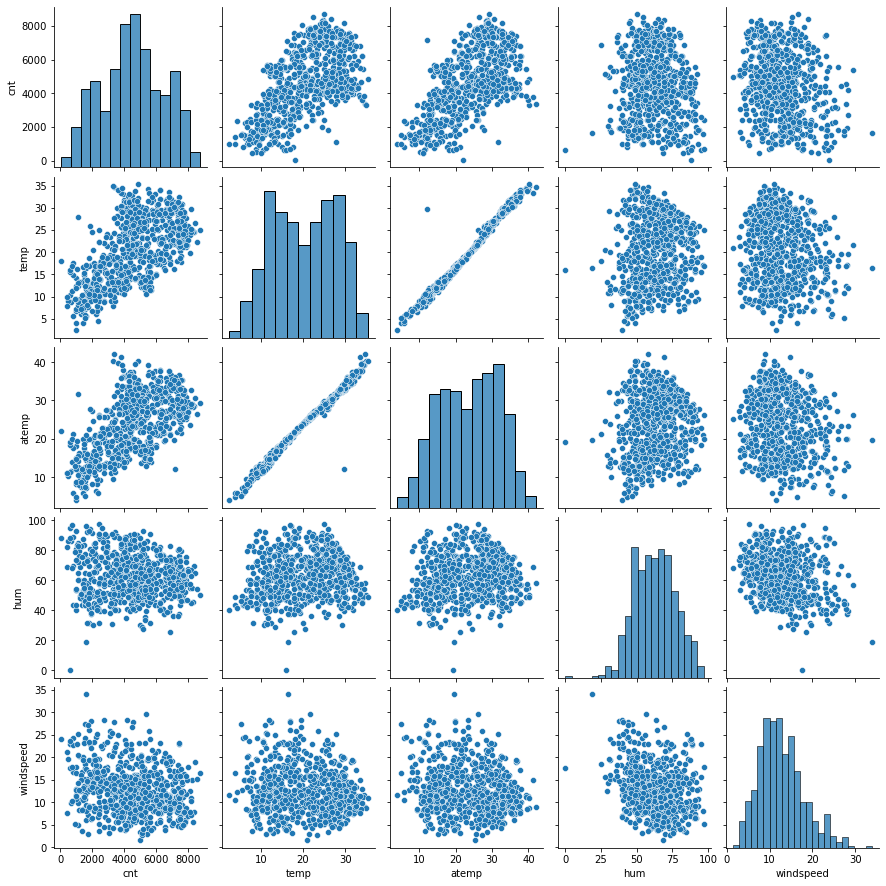

In [8]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (10,15))
sns.pairplot(data = Bike,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
plt.show()

### Visualising Catagorical Variables

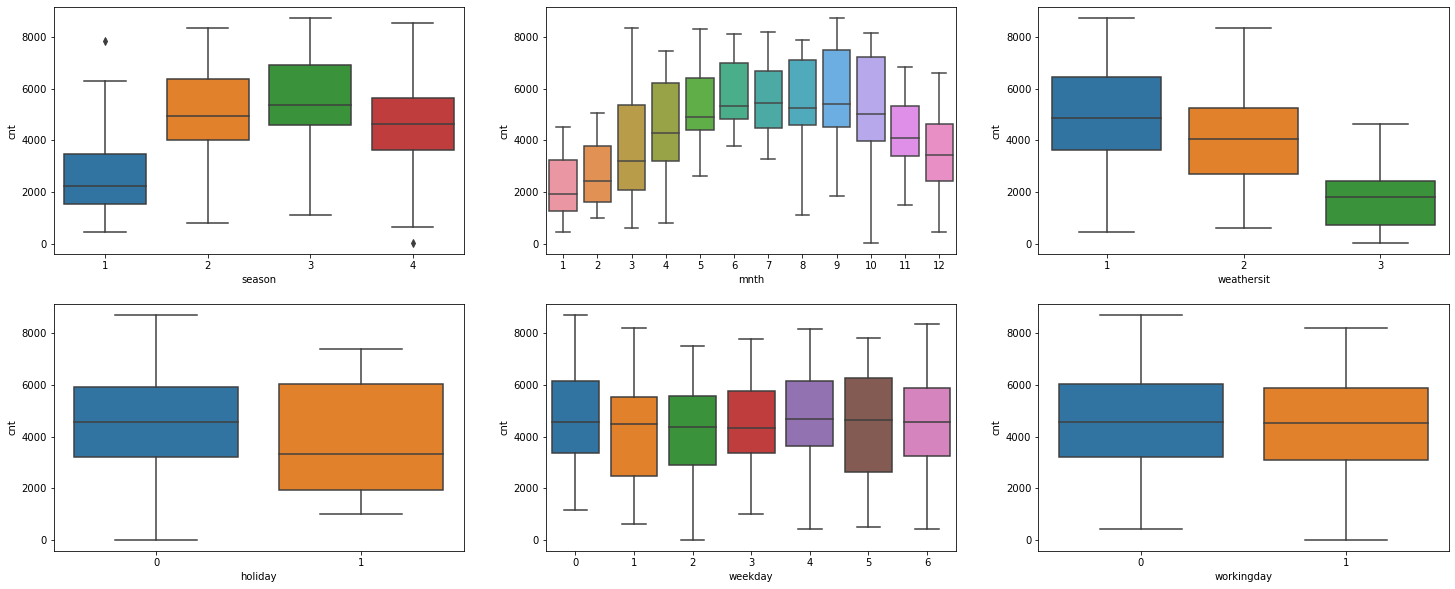

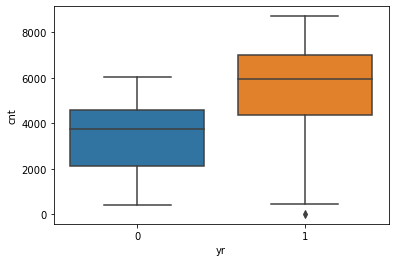

In [9]:
# Build boxplot of all categorical variables (before creating dummies) against the target variable 'cnt' to see how each of the predictor variable stackup against the target variable.
# Draw box plots for indepent variables with continuous values

plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = Bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = Bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = Bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = Bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = Bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = Bike)
plt.show()
sns.boxplot(x = 'yr', y = 'cnt', data = Bike)
plt.show()

1. Season: 3: fall has highest demand for rental bikes
2. Demand for next year has grown. 
3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is        decreasing
4. When there is a holiday, demand has decreased.
5. Weekday is not giving clear picture about demand.
6. The clear weathershit has highest demand
7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme            weather conditions.

## Coreleation 

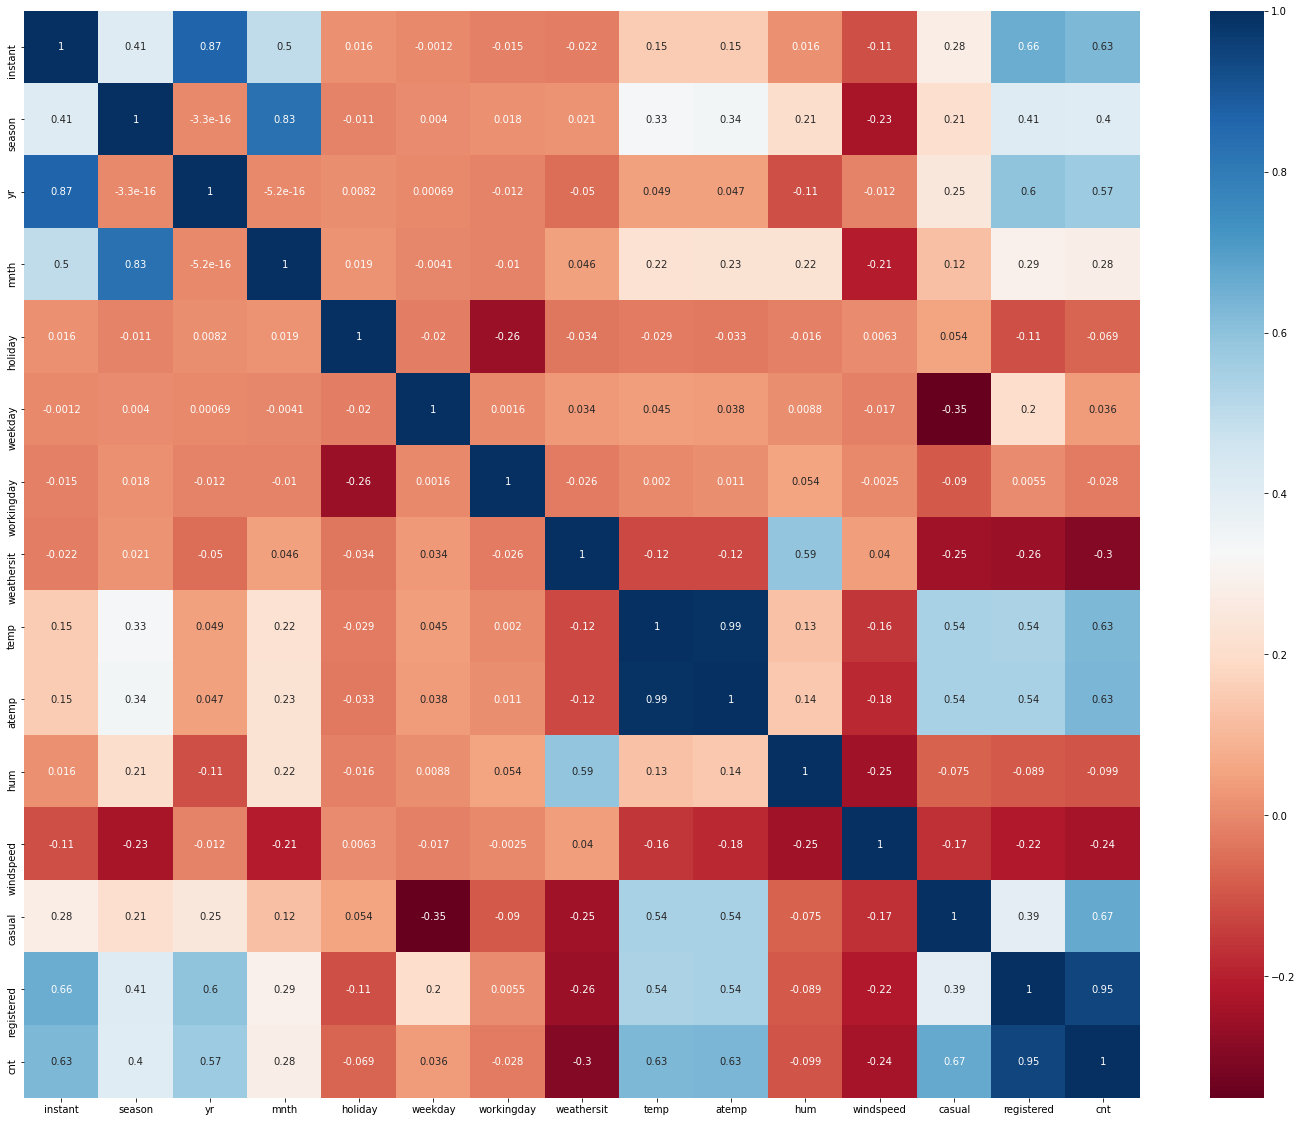

In [10]:
# Let's check the correlation coefficients to see which variables are highly correlated. Note:
# here we are considering only those variables (dataframe: bike_new) that were chosen for analysis

plt.figure(figsize = (25,20))
sns.heatmap(Bike.corr(), annot = True, cmap="RdBu")
plt.show()

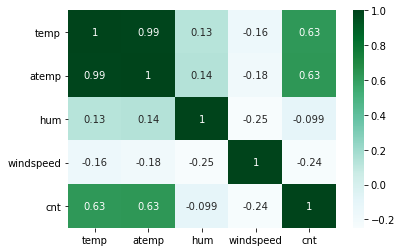

In [11]:
# Checking continuous variables relationship with each other
sns.heatmap(Bike[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

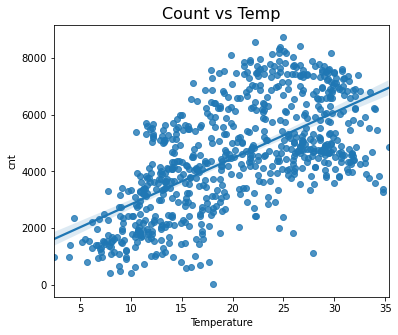

In [12]:
plt.figure(figsize=(6,5))
plt.title("Count vs Temp",fontsize=16)
sns.regplot(data = Bike,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

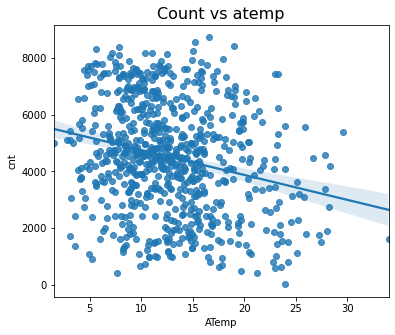

In [13]:
plt.figure(figsize=(6,5))
plt.title("Count vs atemp",fontsize=16)
sns.regplot(data = Bike,y="cnt",x="windspeed")
plt.xlabel("ATemp")
plt.show()

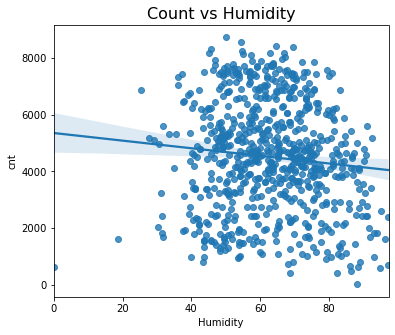

In [14]:
plt.figure(figsize=(6,5))
plt.title("Count vs Humidity",fontsize=16)
sns.regplot(data = Bike,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

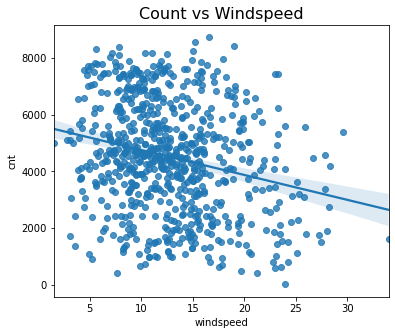

In [15]:
plt.figure(figsize=(6,5))
plt.title("Count vs Windspeed",fontsize=16)
sns.regplot(data = Bike,y="cnt",x="windspeed")
plt.xlabel("windspeed")
plt.show()

## Step-3 Data Cleaning

Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset. 

### Check for NULL/MISSING values

In [16]:
round(100*(Bike.isnull().sum()/len(Bike)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

## Drop columns that are not useful for analysis
1. 'Instant' is just a row instance identifier.
2. 'dteday' is removed as we have some of date features like mnth and year and weekday already in other columns and also for this analysis we dont need to consider day to day trend in demand for bikes.
3. 'casual and registered' variables are not available at the time of prediction and also these describe the target variable cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [17]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
Bike['days_old'] = (pd.to_datetime(Bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [18]:
# Droping instant column as it is index column which has nothing to do with target
Bike.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
Bike.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

Bike.drop(['casual'], axis = 1, inplace = True)
Bike.drop(['registered'], axis = 1, inplace = True)

In [19]:
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [20]:
bike_Categorical = Bike[['season', 'mnth', 'weekday', 'weathersit']]

In [21]:
# Convert to 'category' data type

bike_Categorical.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

bike_Categorical.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

bike_Categorical.mnth = bike_Categorical.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})

bike_Categorical.weekday = bike_Categorical.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

bike_Categorical.head()

,season,mnth,weekday,weathersit
0,spring,jan,mon,moderate
1,spring,jan,tue,moderate
2,spring,jan,wed,good
3,spring,jan,thu,good
4,spring,jan,fri,good


## Dummy 

Lets create Dummy variables. So it will be easy for us in comparing with other variables

In [22]:
bike_Categorical = pd.get_dummies(bike_Categorical)
bike_Categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   season_fall          730 non-null    uint8
 1   season_spring        730 non-null    uint8
 2   season_summer        730 non-null    uint8
 3   season_winter        730 non-null    uint8
 4   mnth_apr             730 non-null    uint8
 5   mnth_aug             730 non-null    uint8
 6   mnth_dec             730 non-null    uint8
 7   mnth_feb             730 non-null    uint8
 8   mnth_jan             730 non-null    uint8
 9   mnth_jul             730 non-null    uint8
 10  mnth_jun             730 non-null    uint8
 11  mnth_mar             730 non-null    uint8
 12  mnth_may             730 non-null    uint8
 13  mnth_nov             730 non-null    uint8
 14  mnth_oct             730 non-null    uint8
 15  mnth_sept            730 non-null    uint8
 16  weekday_fri          730 n

In [23]:
# Lets join both the data set
Bike = pd.concat([Bike, bike_Categorical], axis = 1)
Bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,...,0,1,0,0,0,0,0,0,0,1
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,...,0,0,0,0,0,1,0,0,0,1
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,1,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,...,0,0,0,0,1,0,0,0,1,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,...,1,0,0,0,0,0,0,0,1,0


In [24]:
Bike.shape

(730, 39)

In [25]:
# Drop Season, mnth, weekday, weathersit as we have created the dummies for it

Bike.drop(Bike[['season', 'mnth', 'weekday', 'weathersit']], axis = 1, inplace = True)

In [26]:
Bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   days_old             730 non-null    int64  
 9   season_fall          730 non-null    uint8  
 10  season_spring        730 non-null    uint8  
 11  season_summer        730 non-null    uint8  
 12  season_winter        730 non-null    uint8  
 13  mnth_apr             730 non-null    uint8  
 14  mnth_aug             730 non-null    uint8  
 15  mnth_dec             730 non-null    uin

## Step 4: Splitting the Data into Training and Testing Sets
As you know, the first basic step for regression is performing a train-test split.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
np.random.seed(0)

df_train, df_test = train_test_split(Bike, train_size = 0.7, test_size = 0.3, random_state = 200)

In [29]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 728 to 695
Data columns (total 35 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   510 non-null    int64  
 1   holiday              510 non-null    int64  
 2   workingday           510 non-null    int64  
 3   temp                 510 non-null    float64
 4   atemp                510 non-null    float64
 5   hum                  510 non-null    float64
 6   windspeed            510 non-null    float64
 7   cnt                  510 non-null    int64  
 8   days_old             510 non-null    int64  
 9   season_fall          510 non-null    uint8  
 10  season_spring        510 non-null    uint8  
 11  season_summer        510 non-null    uint8  
 12  season_winter        510 non-null    uint8  
 13  mnth_apr             510 non-null    uint8  
 14  mnth_aug             510 non-null    uint8  
 15  mnth_dec             510 non-null    u

In [30]:
df_train.shape

(510, 35)

## Rescaling the Features
As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)
This time, we will use MinMax scaling.

In [31]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# Checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_fall,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
728,1,0,1,10.489153,11.58500,48.3333,23.500518,1796,728,0,...,0,1,0,0,0,0,0,0,1,0
56,0,0,1,11.582500,14.10960,53.7917,12.500257,1969,56,0,...,0,1,0,0,0,0,0,0,1,0
13,0,0,0,6.595670,9.42065,53.7826,8.478716,1421,13,0,...,0,0,0,1,0,0,0,0,1,0
120,0,0,1,18.518347,22.41020,76.2083,7.125718,3351,120,0,...,0,0,0,0,0,1,0,0,0,1
252,0,0,1,27.060000,30.39810,75.3750,10.291736,5345,252,1,...,0,1,0,0,0,0,0,0,1,0


In [34]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [35]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_fall,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
728,1,0,1,0.252441,0.204242,0.498067,0.676936,0.164795,728,0,...,0,1,0,0,0,0,0,0,1,0
56,0,0,1,0.286664,0.271808,0.554315,0.338464,0.185682,56,0,...,0,1,0,0,0,0,0,0,1,0
13,0,0,0,0.130569,0.146318,0.554222,0.214724,0.119522,13,0,...,0,0,0,1,0,0,0,0,1,0
120,0,0,1,0.503767,0.493957,0.785315,0.173093,0.352529,120,0,...,0,0,0,0,0,1,0,0,0,1
252,0,0,1,0.771134,0.707736,0.776728,0.270509,0.593263,252,1,...,0,1,0,0,0,0,0,0,1,0


In [36]:
# Lets confirm that all values lies between 0 & 1.
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_fall,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.488235,0.033333,0.698039,0.555129,0.525337,0.649374,0.350547,0.489265,358.776471,0.239216,...,0.139216,0.152941,0.127451,0.147059,0.145098,0.131373,0.156863,0.021569,0.641176,0.337255
std,0.500352,0.179682,0.459559,0.232861,0.215911,0.146392,0.162339,0.233589,212.370078,0.427024,...,0.346511,0.360284,0.333805,0.354512,0.352545,0.338139,0.364028,0.145413,0.480126,0.473237
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353506,0.342176,0.542353,0.234958,0.325456,170.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560983,0.540443,0.647488,0.330767,0.494265,357.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.763381,0.707735,0.756118,0.438134,0.655952,538.750000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,729.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 5: Building a linear model

### Dividing into X and Y sets for the model building

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

In [37]:
y = df_train.pop('cnt')
X = df_train

In [38]:
#Train Test split with 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 200)

In [39]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_fall,season_spring,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
728,1,0,1,0.252441,0.204242,0.498067,0.676936,728,0,1,...,0,1,0,0,0,0,0,0,1,0
56,0,0,1,0.286664,0.271808,0.554315,0.338464,56,0,1,...,0,1,0,0,0,0,0,0,1,0
13,0,0,0,0.130569,0.146318,0.554222,0.214724,13,0,1,...,0,0,0,1,0,0,0,0,1,0
120,0,0,1,0.503767,0.493957,0.785315,0.173093,120,0,0,...,0,0,0,0,0,1,0,0,0,1
252,0,0,1,0.771134,0.707736,0.776728,0.270509,252,1,0,...,0,1,0,0,0,0,0,0,1,0


In [40]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(357, 34)
(153, 34)


## Build a Model using RFE and Automated approach

In [41]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [42]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [43]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 19),
 ('temp', False, 7),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', False, 20),
 ('season_fall', False, 8),
 ('season_spring', True, 1),
 ('season_summer', False, 17),
 ('season_winter', True, 1),
 ('mnth_apr', False, 5),
 ('mnth_aug', False, 13),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 18),
 ('mnth_jan', False, 6),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 4),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 11),
 ('mnth_sept', True, 1),
 ('weekday_fri', False, 15),
 ('weekday_mon', False, 16),
 ('weekday_sat', False, 12),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 9),
 ('weekday_tue', True, 1),
 ('weekday_wed', False, 3),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 2)]

### Manual elimination

In [44]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

In [45]:
# Function to calculate VIFs and print them
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [46]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_jul', 'mnth_mar', 'mnth_nov',
       'mnth_sept', 'weekday_tue', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [47]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'temp', 'days_old', 'season_fall', 'season_summer',
       'mnth_apr', 'mnth_aug', 'mnth_feb', 'mnth_jan', 'mnth_jun', 'mnth_may',
       'mnth_oct', 'weekday_fri', 'weekday_mon', 'weekday_sat', 'weekday_sun',
       'weekday_thu', 'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [48]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [49]:
X_train_rfe.shape

(357, 15)

# Step- 6 Build Model

### Model 1 - Start with all variables selected by RFE

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())

In [52]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     157.0
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          6.45e-143
Time:                        23:32:06   Log-Likelihood:                 377.21
No. Observations:                 357   AIC:                            -722.4
Df Residuals:                     341   BIC:                            -660.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2847    

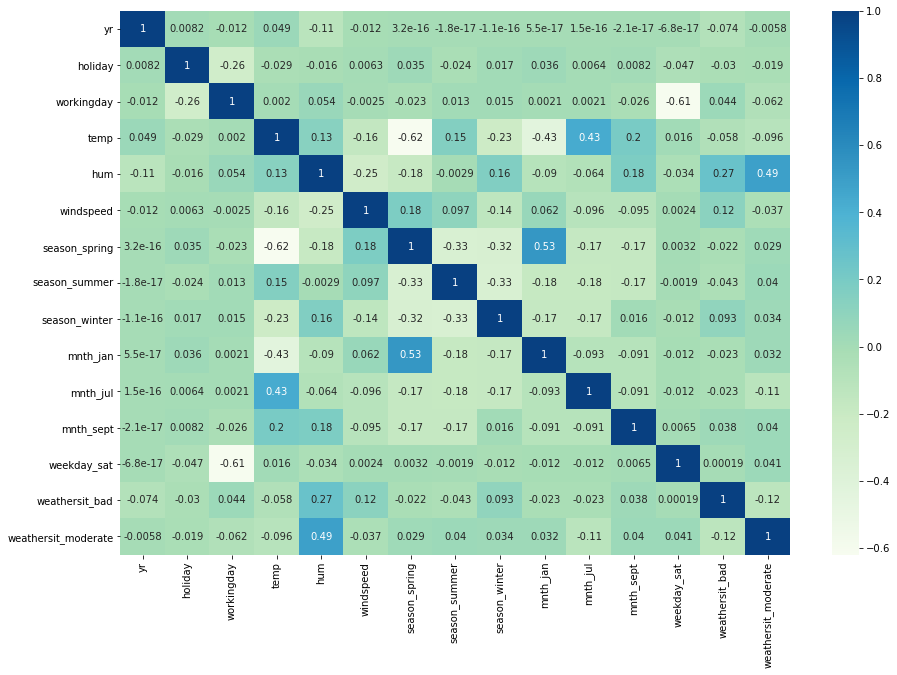

In [53]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(Bike[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

## All the columns have p-value > .05 so checking VIFs

In [54]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     169.3
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.95e-140
Time:                        23:33:17   Log-Likelihood:                 365.79
No. Observations:                 357   AIC:                            -703.6
Df Residuals:                     343   BIC:                            -649.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1686    

In [55]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     194.5
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.51e-140
Time:                        23:33:40   Log-Likelihood:                 360.54
No. Observations:                 357   AIC:                            -697.1
Df Residuals:                     345   BIC:                            -650.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1442    

In [56]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     122.7
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          2.58e-107
Time:                        23:33:45   Log-Likelihood:                 278.39
No. Observations:                 357   AIC:                            -534.8
Df Residuals:                     346   BIC:                            -492.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5808    

In [57]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.621
Method:                 Least Squares   F-statistic:                     59.44
Date:                Wed, 03 Nov 2021   Prob (F-statistic):           4.83e-69
Time:                        23:33:59   Log-Likelihood:                 186.60
No. Observations:                 357   AIC:                            -351.2
Df Residuals:                     346   BIC:                            -308.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3617    

In [58]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     115.8
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          5.35e-104
Time:                        23:34:04   Log-Likelihood:                 270.45
No. Observations:                 357   AIC:                            -518.9
Df Residuals:                     346   BIC:                            -476.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.5205    

In [59]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul','season_winter', 'mnth_sept', 'weekday_sun',
        'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     223.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.51e-138
Time:                        23:34:19   Log-Likelihood:                 350.13
No. Observations:                 357   AIC:                            -680.3
Df Residuals:                     347   BIC:                            -641.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1212    

In [60]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [61]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul', 'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

0.12118706580960009 [ 0.24704798 -0.1111211  -0.05430991  0.08248105  0.05159235  0.02600135
 -0.27231225 -0.08382844  0.52318404]


# Model Evaluation

In [62]:
y_train_pred = lr.predict(X_train[cols])

In [63]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

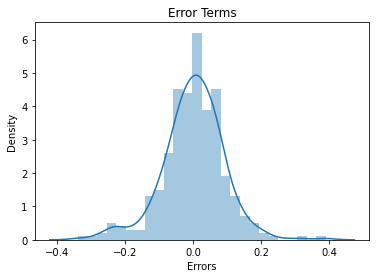

In [64]:
plot_res_dist(y_train, y_train_pred)

### Errors are normally distribured here with mean 0. 

When errors are normally distributed we dont need to worry everything seems to be fine

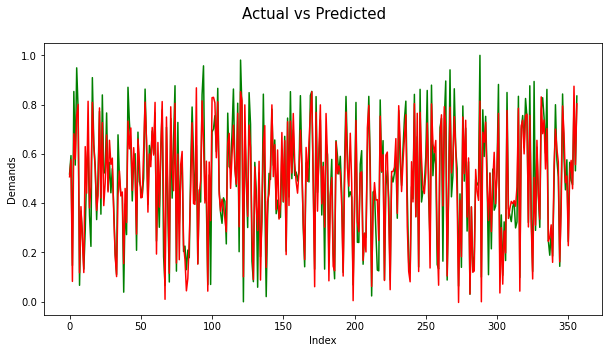

In [69]:
# Actual vs Predicted
plt.figure(figsize=(10,5))
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="Green")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

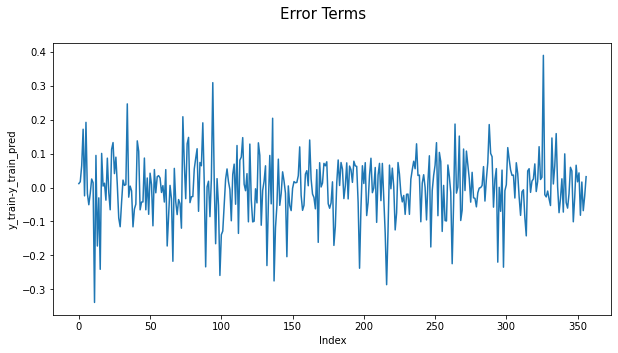

In [70]:
# Error Terms
plt.figure(figsize=(10,5))
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [71]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8528072154801443

## Linearity Check

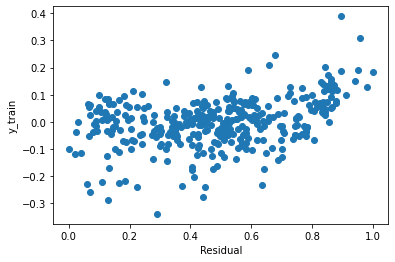

In [72]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

In [73]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed', 'days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [74]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### R-Squared value for test predictions

In [75]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

-1.4524871506323729

## Homoscedacity

Text(0, 0.5, 'y_test_pred')

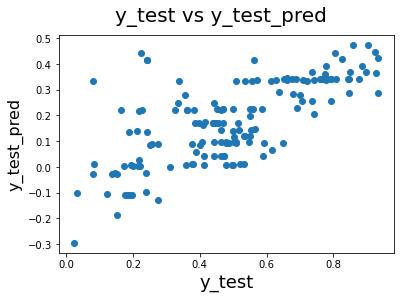

In [76]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)          
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_test_pred', fontsize = 16)

### Plot Test vs Predicted test values

In [77]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)            
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Counts', fontsize=16)                             

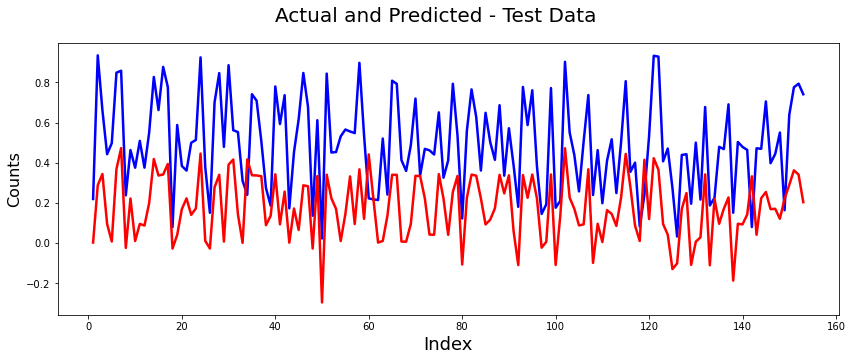

In [78]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

In [79]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1, 150, 1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)               
    plt.xlabel('Index', fontsize=18)                      
    plt.ylabel('Counts - Predicted Counts', fontsize=16)   

## Making Predictions

In [81]:
# Checking data before scaling
Bike.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_fall,...,weekday_fri,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,0,...,1,0,0,0,0,0,0,0,1,0


## Intrepretting the Model
Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [82]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     223.4
Date:                Wed, 03 Nov 2021   Prob (F-statistic):          1.51e-138
Time:                        23:40:46   Log-Likelihood:                 350.13
No. Observations:                 357   AIC:                            -680.3
Df Residuals:                     347   BIC:                            -641.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1212    

## Interepretation of results
Analysing the above model, the comapany should focus on the following features:

1. Company should focus on expanding business during Spring.

2.	In spring season Business is good as we can see from the data. So we can maximise next time if we will spend more things on Marketing. 

3. Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.

4. There would be less bookings during Light Snow or Rain, they could probably use this time to service the bikes without having business impact.

Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather is pleasant and also advertise a little bit more for September as this is when business would be at its best.

Conclusion
Significant variables to predict the demand for shared bikes

1. holiday
2. temp
3. hum
4. windspeed
5. Season
6. months(January, July, September, November, December)
7. Year (2019), Every year it will increase 
8. Sunday
9. weathersit( Light Snow, Mist + Cloudy)